In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Load data
df = pd.read_csv('results.csv')

# Sparse matrix
sparse_matrix_name = 'cage4'

# Value of k (number of columns in the Dense Vector)
k = 3

# Filter out the data based on the sparse matrix name
df_filtered = df[df['File Name'].str.contains(sparse_matrix_name) & df['File Name'].str.contains('k' + str(k))]
df_filtered.head()

,File Name,Cores Number,Sparse Matrix,Dense Vector,Serial Algo Execution time,Row-wise Average Communication Time,Row-wise Average Computation Time,Row-wise Execution time,Row-wise Result,Column-wise Average Communication Time,Column-wise Average Computation Time,Column-wise Execution time,Column-wise Result,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,Non-zero Elements Execution time,Non-zero Elements Result,PETSc Execution time,PETSc Result
360,cage4_mtx_k3_cores10_chunks1_cpus10,10,9x9,9x3,0.000008,0.000587,1.171230e-06,0.001261,same,0.000013,8.240340e-07,0.000157,same,0.000234,0.000002,0.000405,same,0.003948,same
361,cage4_mtx_k3_cores10_chunks2_cpus5,10,9x9,9x3,0.000007,0.000616,1.438710e-06,0.001183,same,0.000014,8.024280e-07,0.000163,same,0.000247,0.000002,0.000406,same,0.005606,same
362,cage4_mtx_k3_cores10_chunks5_cpus2,10,9x9,9x3,0.000007,0.000571,8.553270e-07,0.001126,same,0.000009,8.359550e-07,0.000052,same,0.000227,0.000002,0.000302,same,0.006048,same
363,cage4_mtx_k3_cores11_chunks1_cpus11,11,9x9,9x3,0.000007,0.000801,1.082370e-06,0.001710,same,0.000009,8.026310e-07,0.000045,same,0.000028,0.000002,0.000048,same,0.006405,same
364,cage4_mtx_k3_cores12_chunks1_cpus12,12,9x9,9x3,0.000007,0.000822,1.106410e-06,0.001496,same,0.000007,7.227060e-07,0.000045,same,0.000029,0.000002,0.000048,same,0.008309,same


In [88]:
df_error = df_filtered[
    (df_filtered['Column-wise Result'] == "different") |
    (df_filtered['Row-wise Result'] == "different") |
    (df_filtered['Non-zero Elements Result'] == "different") |
    (df_filtered["PETSc Result"] == "different")
]
print("Number of errors: ", len(df_error))
df_error.head()


Number of errors:  1


,File Name,Cores Number,Sparse Matrix,Dense Vector,Serial Algo Execution time,Row-wise Average Communication Time,Row-wise Average Computation Time,Row-wise Execution time,Row-wise Result,Column-wise Average Communication Time,Column-wise Average Computation Time,Column-wise Execution time,Column-wise Result,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,Non-zero Elements Execution time,Non-zero Elements Result,PETSc Execution time,PETSc Result
402,cage4_mtx_k3_cores33_chunks3_cpus11,33,NaN,NaN,NaN,NaN,NaN,NaN,different,NaN,NaN,NaN,different,NaN,NaN,NaN,different,NaN,different


In [89]:
import re

# Function to extract the number of chunks and processes per chunk from the file name
def extract_chunks_and_processes(file_name):
    match = re.search(r'cores(\d+)_chunks(\d+)_cpus(\d+)', file_name)
    if match:
        #total_cores = int(match.group(1))
        chunks = int(match.group(2))
        cpus_per_chunk = int(match.group(3))
        return chunks, cpus_per_chunk
    else:
        return None, None

# Apply the function to the dataframe
df_filtered[['Chunks', 'CPUs per Chunk']] = df_filtered.apply(lambda row: extract_chunks_and_processes(row['File Name']), axis=1, result_type='expand')

df_filtered.head()


/var/folders/dl/8q6wl_5d3xg5j5ynz7vqlq_c0000gn/T/ipykernel_37406/2506897266.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Chunks', 'CPUs per Chunk']] = df_filtered.apply(lambda row: extract_chunks_and_processes(row['File Name']), axis=1, result_type='expand')
/var/folders/dl/8q6wl_5d3xg5j5ynz7vqlq_c0000gn/T/ipykernel_37406/2506897266.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[['Chunks', 'CPUs per Chunk']] = df_filtered.apply(lambda row: extract_chunks_and_processes

,File Name,Cores Number,Sparse Matrix,Dense Vector,Serial Algo Execution time,Row-wise Average Communication Time,Row-wise Average Computation Time,Row-wise Execution time,Row-wise Result,Column-wise Average Communication Time,...,Column-wise Execution time,Column-wise Result,Non-zero elements Average Communication Time,Non-zero elements Average Computation Time,Non-zero Elements Execution time,Non-zero Elements Result,PETSc Execution time,PETSc Result,Chunks,CPUs per Chunk
360,cage4_mtx_k3_cores10_chunks1_cpus10,10,9x9,9x3,0.000008,0.000587,1.171230e-06,0.001261,same,0.000013,...,0.000157,same,0.000234,0.000002,0.000405,same,0.003948,same,1,10
361,cage4_mtx_k3_cores10_chunks2_cpus5,10,9x9,9x3,0.000007,0.000616,1.438710e-06,0.001183,same,0.000014,...,0.000163,same,0.000247,0.000002,0.000406,same,0.005606,same,2,5
362,cage4_mtx_k3_cores10_chunks5_cpus2,10,9x9,9x3,0.000007,0.000571,8.553270e-07,0.001126,same,0.000009,...,0.000052,same,0.000227,0.000002,0.000302,same,0.006048,same,5,2
363,cage4_mtx_k3_cores11_chunks1_cpus11,11,9x9,9x3,0.000007,0.000801,1.082370e-06,0.001710,same,0.000009,...,0.000045,same,0.000028,0.000002,0.000048,same,0.006405,same,1,11
364,cage4_mtx_k3_cores12_chunks1_cpus12,12,9x9,9x3,0.000007,0.000822,1.106410e-06,0.001496,same,0.000007,...,0.000045,same,0.000029,0.000002,0.000048,same,0.008309,same,1,12


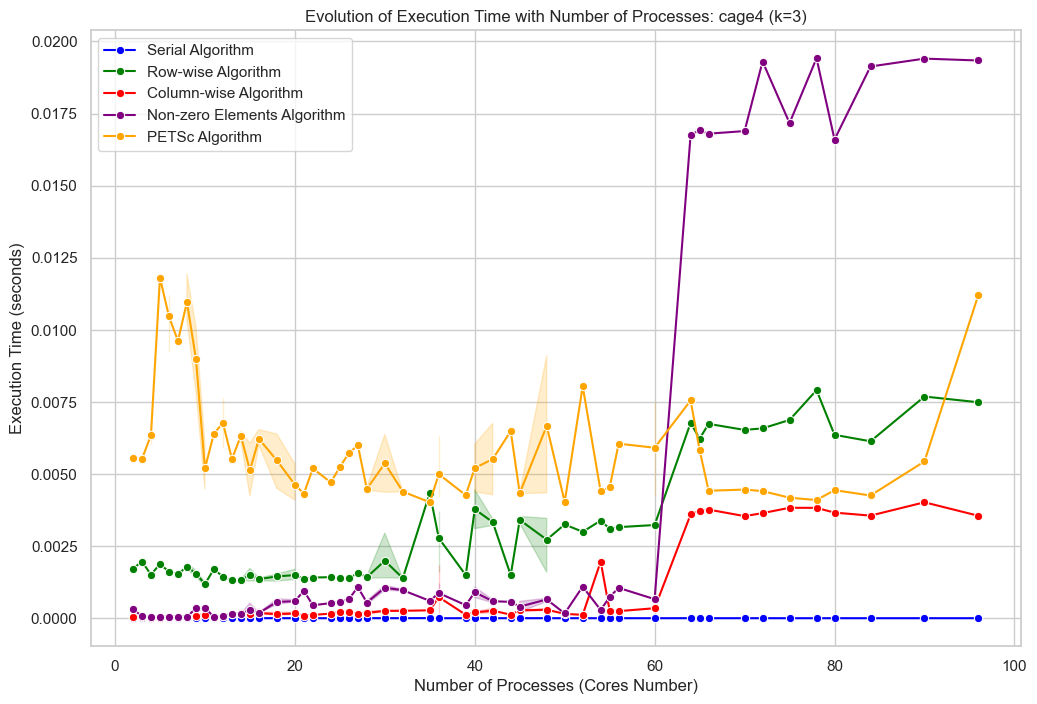

In [93]:
# Sorting the dataframe based on 'Cores Number' for better plotting
df_sorted = df_filtered.sort_values(by='Cores Number')

# Plotting using Seaborn
plt.figure(figsize=(12, 8))

# Setting the style
sns.set(style="whitegrid")

# Plot for each algorithm
sns.lineplot(x='Cores Number', y='Serial Algo Execution time', data=df_sorted, marker='o', label='Serial Algorithm', color='blue')
sns.lineplot(x='Cores Number', y='Row-wise Execution time', data=df_sorted, marker='o', label='Row-wise Algorithm', color='green')
sns.lineplot(x='Cores Number', y='Column-wise Execution time', data=df_sorted, marker='o', label='Column-wise Algorithm', color='red')
sns.lineplot(x='Cores Number', y='Non-zero Elements Execution time', data=df_sorted, marker='o', label='Non-zero Elements Algorithm', color='purple')
sns.lineplot(x='Cores Number', y='PETSc Execution time', data=df_sorted, marker='o', label='PETSc Algorithm', color='orange')

plt.xlabel('Number of Processes (Cores Number)')
plt.ylabel('Execution Time (seconds)')
plt.title('Evolution of Execution Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
plt.legend()

# Saving the plot in the 'results' folder
plt.savefig('results/' + sparse_matrix_name + '_k' + str(k) + '.png')

plt.show()

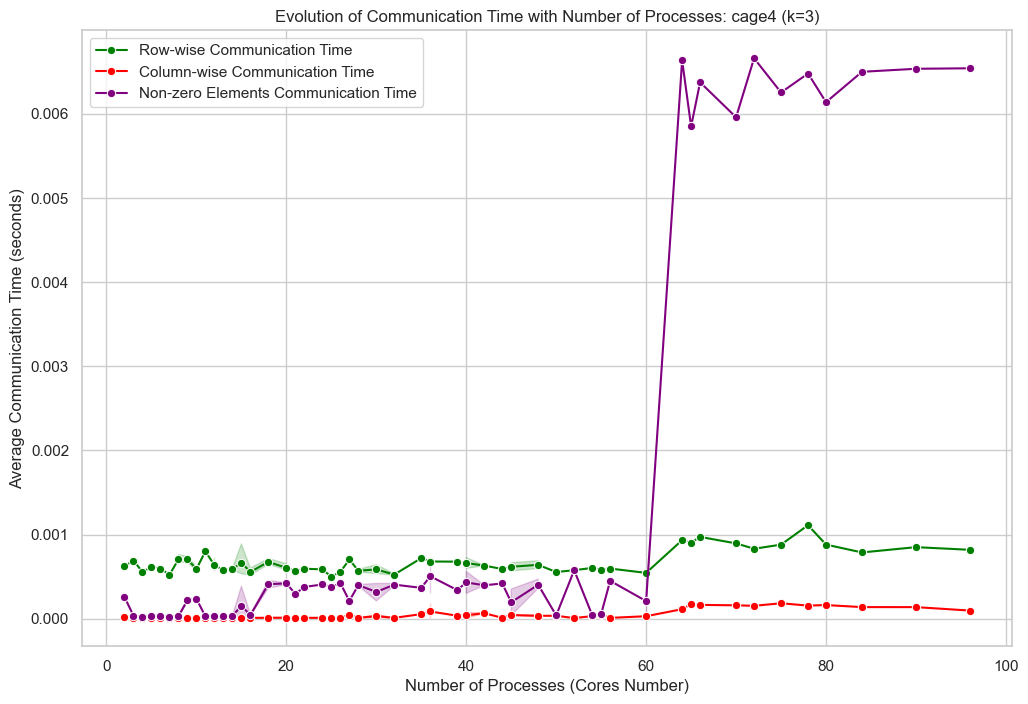

In [94]:
# Plotting using Seaborn
plt.figure(figsize=(12, 8))

# Setting the style
sns.set(style="whitegrid")

# Row-wise Communication Time
sns.lineplot(x='Cores Number', y='Row-wise Average Communication Time', data=df_sorted, marker='o', label='Row-wise Communication Time', color='green')

# Column-wise Communication Time
sns.lineplot(x='Cores Number', y='Column-wise Average Communication Time', data=df_sorted, marker='o', label='Column-wise Communication Time', color='red')

# Non-zero elements Communication Time
sns.lineplot(x='Cores Number', y='Non-zero elements Average Communication Time', data=df_sorted, marker='o', label='Non-zero Elements Communication Time', color='purple')

plt.xlabel('Number of Processes (Cores Number)')
plt.ylabel('Average Communication Time (seconds)')
plt.title('Evolution of Communication Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
plt.legend()

plt.show()

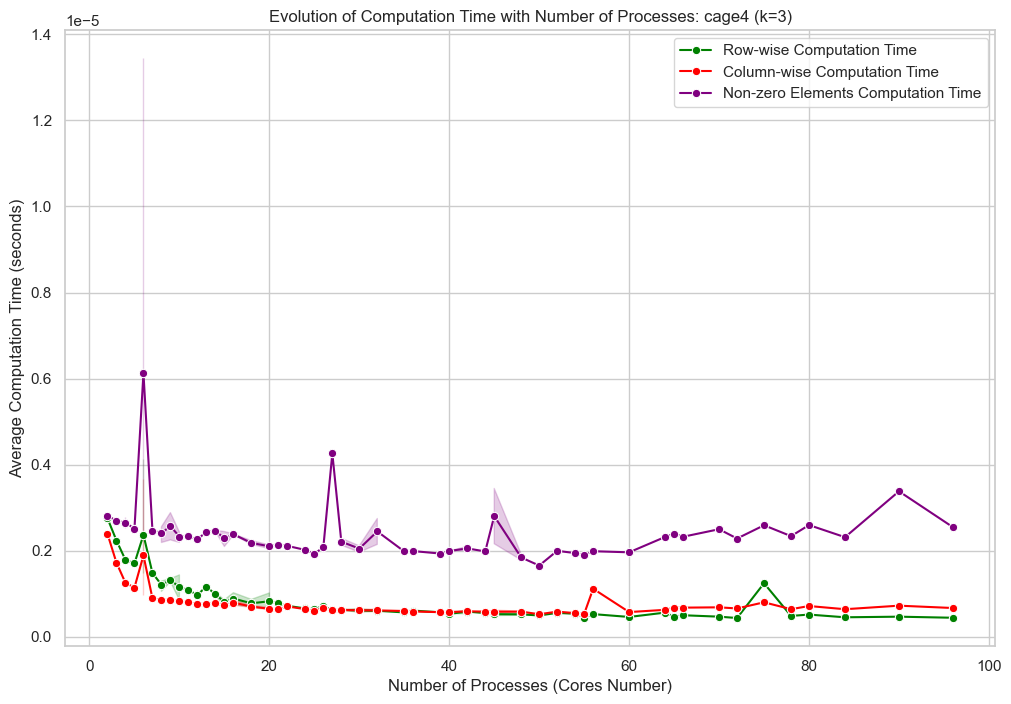

In [95]:
# Plotting using Seaborn
plt.figure(figsize=(12, 8))

# Setting the style
sns.set(style="whitegrid")

# Row-wise Computation Time
sns.lineplot(x='Cores Number', y='Row-wise Average Computation Time', data=df_sorted, marker='o', label='Row-wise Computation Time', color='green')

# Column-wise Computation Time
sns.lineplot(x='Cores Number', y='Column-wise Average Computation Time', data=df_sorted, marker='o', label='Column-wise Computation Time', color='red')

# Non-zero elements Computation Time
sns.lineplot(x='Cores Number', y='Non-zero elements Average Computation Time', data=df_sorted, marker='o', label='Non-zero Elements Computation Time', color='purple')

plt.xlabel('Number of Processes (Cores Number)')
plt.ylabel('Average Computation Time (seconds)')
plt.title('Evolution of Computation Time with Number of Processes: ' + sparse_matrix_name + ' (k=' + str(k) + ')')
plt.legend()

plt.show()